I: 즉정 시간=11000ms 샘플링 주파수=500HZ [12 11 11 10  8  6  3  1]
II: 즉정 시간=11000ms 샘플링 주파수=500HZ [18 17 17 15 10  6  2  1]
III: 즉정 시간=11000ms 샘플링 주파수=500HZ [ 6  6  6  5  2  0 -1  0]
aVR: 즉정 시간=11000ms 샘플링 주파수=500HZ [-15 -14 -14 -12  -9  -6  -2  -1]
aVL: 즉정 시간=11000ms 샘플링 주파수=500HZ [3 3 3 3 3 3 2 1]
aVF: 즉정 시간=11000ms 샘플링 주파수=500HZ [12 12 12 10  6  3  1  1]
V1: 즉정 시간=11000ms 샘플링 주파수=500HZ [15 16 16 14 11  7  4  4]
V2: 즉정 시간=11000ms 샘플링 주파수=500HZ [27 23 20 18 17 16 16 15]
V3: 즉정 시간=11000ms 샘플링 주파수=500HZ [30 25 22 22 21 19 16 13]
V4: 즉정 시간=11000ms 샘플링 주파수=500HZ [21 17 14 14 13 12 10  7]
V5: 즉정 시간=11000ms 샘플링 주파수=500HZ [20 16 12 11 10  9  8  7]
V6: 즉정 시간=11000ms 샘플링 주파수=500HZ [15 15 13 11  7  3  0  1]


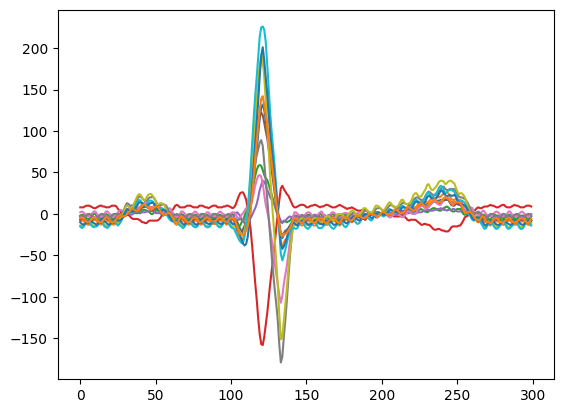

<class 'numpy.ndarray'>


In [74]:
from sierraecg import read_file
import matplotlib.pyplot as plt

f = read_file('PhilipsXmlDeIdStudy.xml')
dic = {}

for lead in f.leads:
    print(f"{lead.label}: 즉정 시간={lead.duration}ms 샘플링 주파수={lead.sampling_freq}HZ {lead.samples[0:8]}")
    dic.update({lead.label:lead.samples})
    #plt.legend(str(lead.label))
    plt.plot(lead.samples[5000:5300])
plt.show()
print(type(lead.samples))

In [115]:
from pydicom import dcmread

In [116]:
from pydicom import dcmread
ds = dcmread("DicomDeIdStudy.dcm")
print(ds.SOPClassUID)
print(ds.SOPClassUID.name)
waveforms = ds.WaveformSequence
multiplex = waveforms[0]
print(multiplex.MultiplexGroupLabel)
print(multiplex.SamplingFrequency)
print(multiplex.NumberOfWaveformChannels)
print(multiplex.NumberOfWaveformSamples)
for ii, channel in enumerate(multiplex.ChannelDefinitionSequence):
    source = channel.ChannelSourceSequence[0].CodeMeaning
    units = 'unitless'
    if 'ChannelSensitivity' in channel:  # Type 1C, may be absent
        units = channel.ChannelSensitivityUnitsSequence[0].CodeMeaning
    print(f"Channel {ii + 1}: {source} ({units})")

1.2.840.10008.5.1.4.1.1.9.1.1
12-lead ECG Waveform Storage
RHYTHM
1000
12
10000
Channel 1: Lead I (Einthoven) (microvolt)
Channel 2: Lead II (microvolt)
Channel 3: Lead III (microvolt)
Channel 4: Lead aVR (microvolt)
Channel 5: Lead aVL (microvolt)
Channel 6: Lead aVF (microvolt)
Channel 7: Lead V1 (microvolt)
Channel 8: Lead V2 (microvolt)
Channel 9: Lead V3 (microvolt)
Channel 10: Lead V4 (microvolt)
Channel 11: Lead V5 (microvolt)
Channel 12: Lead V6 (microvolt)


In [117]:
import io
import numpy as np

In [118]:
print(multiplex.WaveformBitsAllocated)
print(multiplex.WaveformSampleInterpretation)
print(io.BytesIO(multiplex.WaveformData))
b = io.BytesIO(multiplex.WaveformData)
c = np.frombuffer(b.read(),dtype=np.float32)
print(c)
d= np.frombuffer(multiplex.WaveformData,dtype=np.uint8)
print(d.shape)

16
SS
[           nan  8.8161474e-39            nan ...  4.4083841e-39
 -2.5122198e+38 -3.3363288e+38]
(240000,)


In [150]:
from pydicom.waveforms import multiplex_array
raw = multiplex_array(ds, 0, as_raw = True)
print(raw)
arr = ds.waveform_array(0)
print(arr[0, 0])

[[ -73 -116  -43 ... -109  -93  -74]
 [ -73 -117  -44 ... -109  -93  -74]
 [ -73 -118  -44 ... -110  -93  -74]
 ...
 [-136 -206  -71 ... -197 -165 -134]
 [-135 -205  -72 ... -196 -165 -134]
 [-135 -206  -72 ... -196 -165 -134]]
-73.0


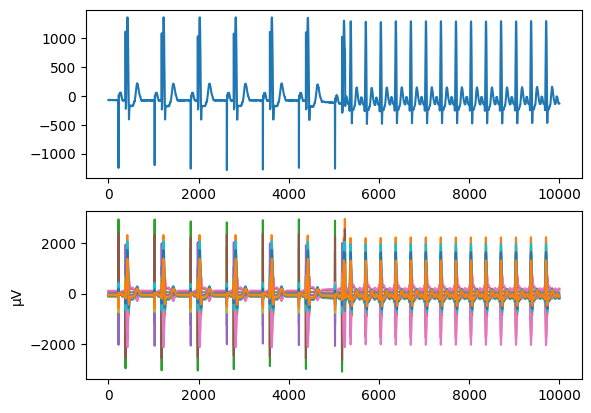

In [155]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(raw[:,0])
ax1.set_ylabel("")
ax2.plot(arr)
ax2.set_ylabel("μV")
plt.show()


In [132]:
import pydicom
import os

info = {}

dcm = pydicom.read_file("DicomDeIdStudy.dcm")

info["PatientID"] = dcm.PatientID               # 환자 ID
info["PatientName"] = dcm.PatientName           # 환자 이름
info["PatientBirthData"] = dcm.PatientBirthDate # 환자의 생년월일
info["PatientAge"] = dcm.PatientAge             # 환자 나이
info['PatientSex'] = dcm.PatientSex             # 환자 성별
info['PatientSize'] = dcm.PatientSize
info['PatientWeight'] = dcm.PatientWeight
info['StudyID'] = dcm.StudyID                   # 검진 ID
info['StudyDate'] = dcm.StudyDate               # 검진 날짜
info['StudyTime'] = dcm.StudyTime               # 검진 시간
info['InstitutionName'] = dcm.InstitutionName   # 기관명
info['PatientInstitutionResidence'] = dcm.PatientInstitutionResidence  # 기관명
info['Manufacturer'] = dcm.Manufacturer         # 장비 제조업체
#info['StudyDescription']=dcm.StudyDescription   # 검진 항목 설명
print(info)

{'PatientID': 'ABC-002148', 'PatientName': 'BOHANNAN^AUSTIN^^', 'PatientBirthData': '', 'PatientAge': '', 'PatientSex': 'U', 'PatientSize': None, 'PatientWeight': None, 'StudyID': '', 'StudyDate': '20190911', 'StudyTime': '144448', 'InstitutionName': '', 'PatientInstitutionResidence': '', 'Manufacturer': ''}


In [156]:

import pylab
from pydicom import dcmread
from pydicom.waveforms import multiplex_array
ds = dcmread("DicomDeIdStudy.dcm")   
arr = ds.waveform_array(0)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 170
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: General ECG Waveform Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.756.5.25.3.2.11142101127091555.1568205888000.1.1
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.756.5.25.4.1.2
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0012) Instance Creation Date              DA: '20190911'
(0008, 0013) Instance Creation Time              TM: '144448'
(0008, 0016) SOP Class UID                       UI: 12-lead ECG Waveform Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.22116.40.20190911144448.1269788834.183.1.1
(0008, 0020) Study Date                          DA: '2